In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import keras
from keras.utils.np_utils import to_categorical
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import copy

Using TensorFlow backend.


## Load the California Housing Dataset

In [2]:
housing = fetch_california_housing()

In [3]:
housing.data.shape

(20640, 8)

In [4]:
housing.target.shape

(20640,)

## Split the Dataset

In [84]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target,
                                                              test_size=0.2,
                                                              random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, 
                                                  y_train_full,
                                                  test_size=0.25,
                                                  random_state=0)

In [85]:
X_train_full_unscaled = X_train_full.astype('float32')
X_train_unscaled = X_train.astype('float32')
X_val_unscaled = X_val.astype('float32')
X_test_unscaled = X_test.astype('float32')

## Normalize the Dataset

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = X_train.astype('float32')
X_val = scaler.transform(X_val)
X_val = X_val.astype('float32')
X_test = scaler.transform(X_test)
X_test = X_test.astype('float32')

X_train_full = np.concatenate([X_train, X_val])

In [87]:
y_train_full = y_train_full.reshape(-1, 1).astype('float32')
y_train = y_train.reshape(-1,1).astype('float32')
y_val = y_val.reshape(-1,1).astype('float32')
y_test = y_test.reshape(-1,1).astype('float32')

## Build the Model

In [12]:
def build_model(n_hidden=2, 
                n_neurons=32, 
                input_shape=8, 
                output_shape=1, 
                activation='selu',
                kernel_initializer='lecun_normal',
                kernel_regularizer=None,
                loss='mean_squared_error',
                optimizer='rmsprop'):
    
    model = keras.models.Sequential()
    
    for layer in range(n_hidden):
        if layer == 0:
            model.add(keras.layers.Dense(n_neurons, 
                                         activation=activation, 
                                         kernel_initializer=kernel_initializer,
                                         kernel_regularizer=kernel_regularizer,
                                         input_shape=(input_shape,)))
        else:
            model.add(keras.layers.Dense(n_neurons, 
                                         activation=activation,
                                         kernel_initializer=kernel_initializer,
                                         kernel_regularizer=kernel_regularizer))
            
    model.add(keras.layers.Dense(output_shape, activation='linear'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])
    
    return model

In [23]:
def plot_model_performance(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.grid(True)
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show();
    
    plt.clf()

    mae = history.history['mae']
    val_mae = history.history['val_mae']

    plt.plot(epochs, mae, 'b', label='Training MAE')
    plt.plot(epochs, val_mae, 'g', label='Validation MAE')
    plt.grid(True)
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show();

## Evaluate Loss Function

In [14]:
losses = ['mean_absolute_error', 'mean_squared_error', 'huber_loss', 'logcosh']

losses_history = []

for loss in losses:
    history = None
    model = None
    model = build_model(loss=loss)
    history = model.fit(X_train,
                        y_train,
                        batch_size=256,
                        epochs=100,
                        validation_data=(X_val, y_val),
                        callbacks=[keras.callbacks.EarlyStopping(patience=2)],
                        verbose=0)
    losses_history.append(history)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Loss function: mean_absolute_error


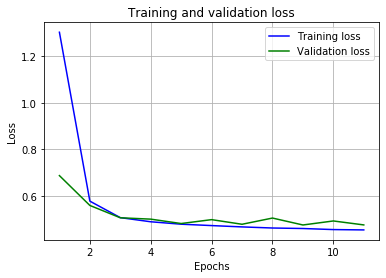

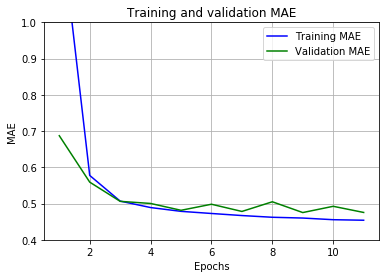

Loss function: mean_squared_error


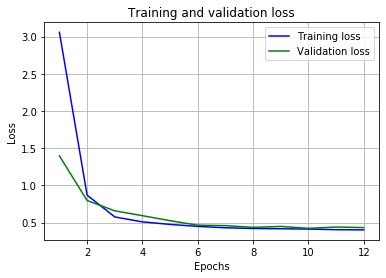

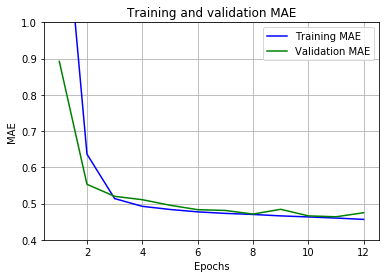

Loss function: huber_loss


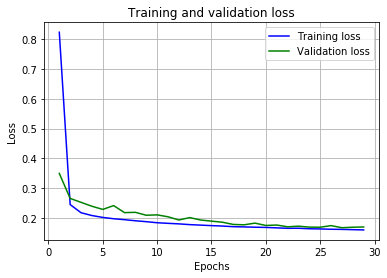

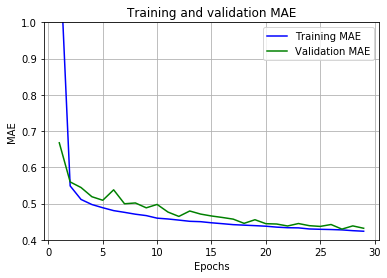

Loss function: logcosh


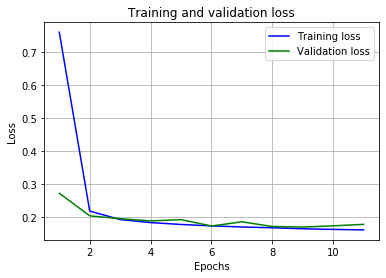

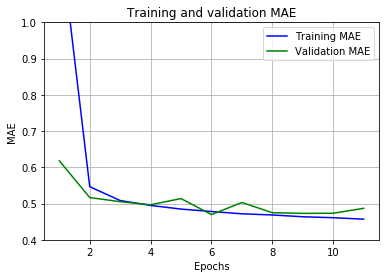

In [24]:
for i, history in enumerate(losses_history):
    print('Loss function:', losses[i])
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.grid(True)
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show();
    
    plt.clf()

    mae = history.history['mae']
    val_mae = history.history['val_mae']

    plt.plot(epochs, mae, 'b', label='Training MAE')
    plt.plot(epochs, val_mae, 'g', label='Validation MAE')
    plt.ylim(0.4, 1.0)
    plt.grid(True)
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show();

## Evaluate Optimizers

In [25]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

opt_histories = []

for opt in optimizers:
    history = None
    model = None
    model = build_model(optimizer=opt, loss='huber_loss')
    history = model.fit(X_train,
                        y_train,
                        batch_size=256,
                        epochs=100,
                        validation_data=(X_val, y_val),
                        callbacks=[keras.callbacks.EarlyStopping(patience=5)],
                        verbose=0)
    opt_histories.append(history)

Optimizer: sgd


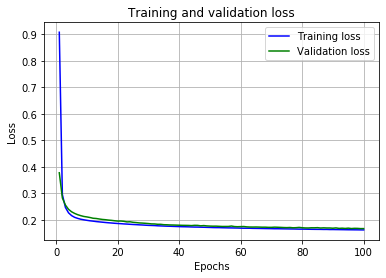

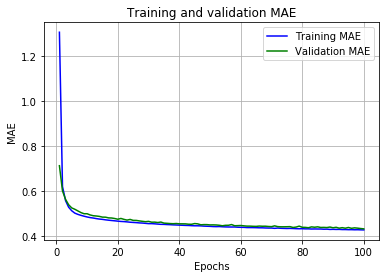

Optimizer: rmsprop


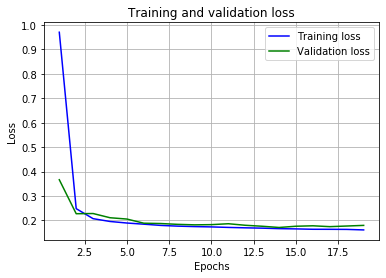

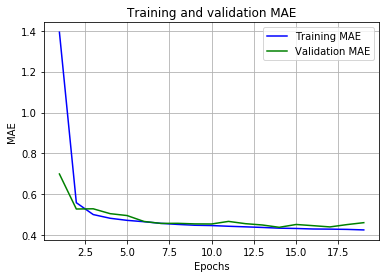

Optimizer: adagrad


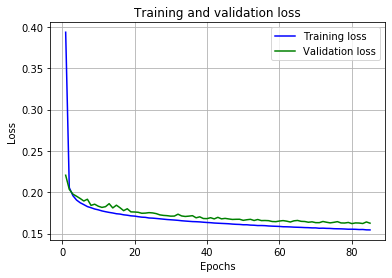

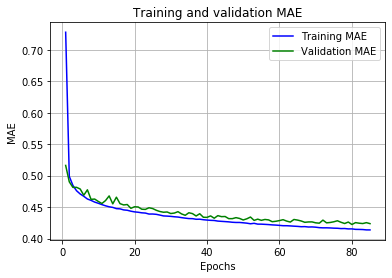

Optimizer: adam


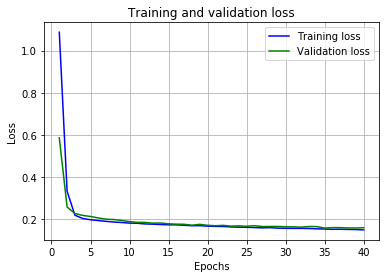

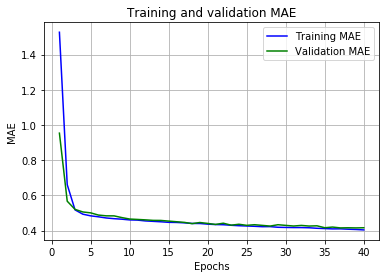

In [26]:
for i, history in enumerate(opt_histories):
    print('Optimizer:', optimizers[i])
    plot_model_performance(history)

## Evaluate Regularization

### Weight decay

#### L1

Train on 12384 samples, validate on 4128 samples
Epoch 1/100
12384/12384 [==============================] - 1s 82us/step - loss: 1.0221 - mae: 1.2008 - val_loss: 0.5399 - val_mae: 0.6413
Epoch 2/100
12384/12384 [==============================] - 0s 23us/step - loss: 0.4508 - mae: 0.5337 - val_loss: 0.4421 - val_mae: 0.5184
Epoch 3/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.4147 - mae: 0.4953 - val_loss: 0.4361 - val_mae: 0.5230
Epoch 4/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.4006 - mae: 0.4857 - val_loss: 0.4166 - val_mae: 0.5059
Epoch 5/100
12384/12384 [==============================] - 0s 23us/step - loss: 0.3889 - mae: 0.4787 - val_loss: 0.4015 - val_mae: 0.4900
Epoch 6/100
12384/12384 [==============================] - 0s 22us/step - loss: 0.3785 - mae: 0.4731 - val_loss: 0.3981 - val_mae: 0.5045
Epoch 7/100
12384/12384 [==============================] - 0s 23us/step - loss: 0.3690 - mae: 0.4680 - val_loss: 0.3748 - v

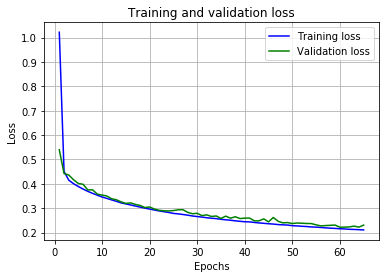

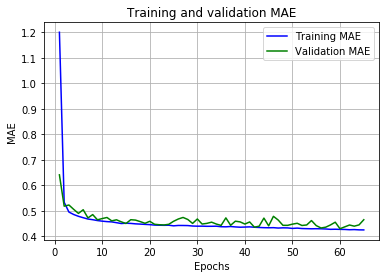

In [89]:
l1_model = build_model(kernel_regularizer=keras.regularizers.l1(0.001), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l1_history = l1_model.fit(X_train,
                          y_train,
                          batch_size=256,
                          epochs=100,
                          validation_data=(X_val, y_val),
                          callbacks=[keras.callbacks.EarlyStopping(patience=5)],
                          verbose=1)

plot_model_performance(l1_history)

In [90]:
l1_model = build_model(kernel_regularizer=keras.regularizers.l1(0.001), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l1_history = l1_model.fit(X_train_full,
                          y_train_full,
                          batch_size=256,
                          epochs=60,
                          verbose=1)

l1_model.evaluate(X_test, y_test)

Epoch 1/60
16512/16512 [==============================] - 1s 45us/step - loss: 1.1215 - mae: 1.2996
Epoch 2/60
16512/16512 [==============================] - 0s 20us/step - loss: 0.7486 - mae: 0.9140
Epoch 3/60
16512/16512 [==============================] - 0s 20us/step - loss: 0.7270 - mae: 0.9023
Epoch 4/60
16512/16512 [==============================] - 0s 20us/step - loss: 0.7127 - mae: 0.8963
Epoch 5/60
16512/16512 [==============================] - 0s 20us/step - loss: 0.7018 - mae: 0.8945
Epoch 6/60
16512/16512 [==============================] - 0s 20us/step - loss: 0.6925 - mae: 0.8945
Epoch 7/60
16512/16512 [==============================] - 0s 19us/step - loss: 0.6835 - mae: 0.8938
Epoch 8/60
16512/16512 [==============================] - 0s 18us/step - loss: 0.6744 - mae: 0.8926
Epoch 9/60
16512/16512 [==============================] - 0s 19us/step - loss: 0.6661 - mae: 0.8924
Epoch 10/60
16512/16512 [==============================] - 0s 20us/step - loss: 0.6593 - mae: 0.8926

[0.5037106723748437, 0.8821617364883423]

#### L2

Train on 12384 samples, validate on 4128 samples
Epoch 1/100
12384/12384 [==============================] - 1s 83us/step - loss: 0.7449 - mae: 1.0683 - val_loss: 0.4303 - val_mae: 0.6937
Epoch 2/100
12384/12384 [==============================] - 0s 23us/step - loss: 0.2972 - mae: 0.5387 - val_loss: 0.3448 - val_mae: 0.5827
Epoch 3/100
12384/12384 [==============================] - 0s 23us/step - loss: 0.2763 - mae: 0.5113 - val_loss: 0.3068 - val_mae: 0.5324
Epoch 4/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.2666 - mae: 0.4977 - val_loss: 0.3075 - val_mae: 0.5447
Epoch 5/100
12384/12384 [==============================] - 0s 23us/step - loss: 0.2597 - mae: 0.4899 - val_loss: 0.2842 - val_mae: 0.5108
Epoch 6/100
12384/12384 [==============================] - 0s 23us/step - loss: 0.2539 - mae: 0.4830 - val_loss: 0.2903 - val_mae: 0.5304
Epoch 7/100
12384/12384 [==============================] - 0s 23us/step - loss: 0.2497 - mae: 0.4788 - val_loss: 0.2726 - v

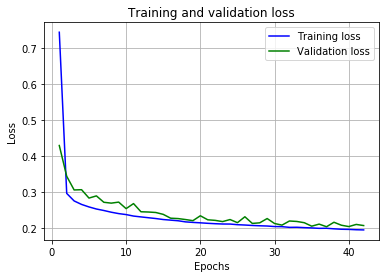

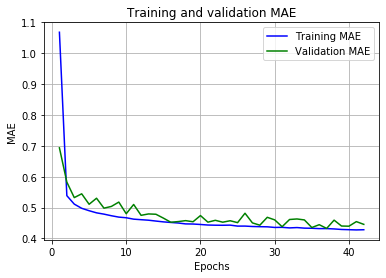

In [91]:
l2_model = build_model(kernel_regularizer=keras.regularizers.l2(0.001), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l2_history = l2_model.fit(X_train,
                          y_train,
                          batch_size=256,
                          epochs=100,
                          validation_data=(X_val, y_val),
                          callbacks=[keras.callbacks.EarlyStopping(patience=5)],
                          verbose=1)

plot_model_performance(l2_history)

In [92]:
l2_model = build_model(kernel_regularizer=keras.regularizers.l2(0.001), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l2_history = l2_model.fit(X_train_full,
                          y_train_full,
                          batch_size=256,
                          epochs=37,
                          verbose=1)

l2_model.evaluate(X_test, y_test)

Epoch 1/37
16512/16512 [==============================] - 1s 45us/step - loss: 0.9211 - mae: 1.2548
Epoch 2/37
16512/16512 [==============================] - 0s 19us/step - loss: 0.6016 - mae: 0.9167
Epoch 3/37
16512/16512 [==============================] - 0s 20us/step - loss: 0.5892 - mae: 0.9050
Epoch 4/37
16512/16512 [==============================] - 0s 19us/step - loss: 0.5826 - mae: 0.9002
Epoch 5/37
16512/16512 [==============================] - 0s 20us/step - loss: 0.5781 - mae: 0.8971
Epoch 6/37
16512/16512 [==============================] - 0s 19us/step - loss: 0.5756 - mae: 0.8967
Epoch 7/37
16512/16512 [==============================] - 0s 18us/step - loss: 0.5731 - mae: 0.8969
Epoch 8/37
16512/16512 [==============================] - 0s 20us/step - loss: 0.5699 - mae: 0.8935
Epoch 9/37
16512/16512 [==============================] - 0s 26us/step - loss: 0.5675 - mae: 0.8938
Epoch 10/37
16512/16512 [==============================] - 0s 26us/step - loss: 0.5651 - mae: 0.8925

[0.5047658014205075, 0.8631787896156311]

### L1&L2

Train on 12384 samples, validate on 4128 samples
Epoch 1/100
12384/12384 [==============================] - 1s 93us/step - loss: 1.7483 - mae: 1.3914 - val_loss: 1.1467 - val_mae: 0.7309
Epoch 2/100
12384/12384 [==============================] - 0s 26us/step - loss: 0.9628 - mae: 0.5496 - val_loss: 0.8984 - val_mae: 0.5336
Epoch 3/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.8267 - mae: 0.5005 - val_loss: 0.7917 - val_mae: 0.5098
Epoch 4/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.7298 - mae: 0.4894 - val_loss: 0.6988 - val_mae: 0.5070
Epoch 5/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.6488 - mae: 0.4853 - val_loss: 0.6328 - val_mae: 0.5118
Epoch 6/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.5807 - mae: 0.4820 - val_loss: 0.5645 - val_mae: 0.4964
Epoch 7/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.5220 - mae: 0.4804 - val_loss: 0.5052 - v

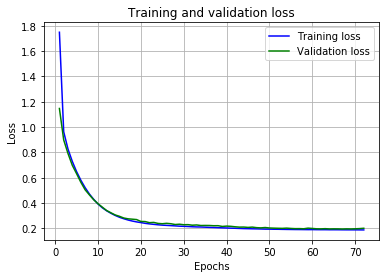

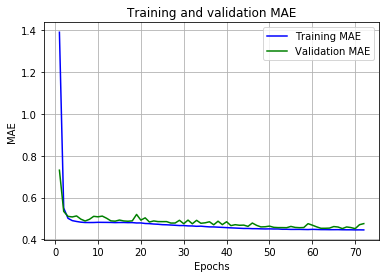

In [93]:
l1_l2_model = build_model(kernel_regularizer=keras.regularizers.l1_l2(0.001), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l1_l2_history = l1_l2_model.fit(X_train,
                          y_train,
                          batch_size=256,
                          epochs=100,
                          validation_data=(X_val, y_val),
                          callbacks=[keras.callbacks.EarlyStopping(patience=5)],
                          verbose=1)

plot_model_performance(l1_l2_history)

In [94]:
l1_l2_model = build_model(kernel_regularizer=keras.regularizers.l1_l2(0.001), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l1_l2_history = l1_l2_model.fit(X_train_full,
                          y_train_full,
                          batch_size=256,
                          epochs=65,
                          verbose=1)

l1_l2_model.evaluate(X_test, y_test)

Epoch 1/65
16512/16512 [==============================] - 1s 49us/step - loss: 1.7192 - mae: 1.3469
Epoch 2/65
16512/16512 [==============================] - 0s 19us/step - loss: 1.1763 - mae: 0.9091
Epoch 3/65
16512/16512 [==============================] - 0s 20us/step - loss: 1.0329 - mae: 0.8979
Epoch 4/65
16512/16512 [==============================] - 0s 21us/step - loss: 0.9238 - mae: 0.8940
Epoch 5/65
16512/16512 [==============================] - 0s 19us/step - loss: 0.8373 - mae: 0.8929
Epoch 6/65
16512/16512 [==============================] - 0s 19us/step - loss: 0.7678 - mae: 0.8931
Epoch 7/65
16512/16512 [==============================] - 0s 20us/step - loss: 0.7105 - mae: 0.8915
Epoch 8/65
16512/16512 [==============================] - 0s 20us/step - loss: 0.6620 - mae: 0.8911
Epoch 9/65
16512/16512 [==============================] - 0s 20us/step - loss: 0.6215 - mae: 0.8902
Epoch 10/65
16512/16512 [==============================] - 0s 21us/step - loss: 0.5904 - mae: 0.8898

[0.5000258634487788, 0.8812848925590515]

### Dropout

Train on 12384 samples, validate on 4128 samples
Epoch 1/100
12384/12384 [==============================] - 1s 95us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 2/100
12384/12384 [==============================] - 0s 25us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 3/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 4/100
12384/12384 [==============================] - 0s 26us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 5/100
12384/12384 [==============================] - 0s 24us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 6/100
12384/12384 [==============================] - 0s 25us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715


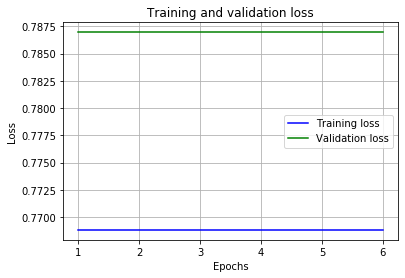

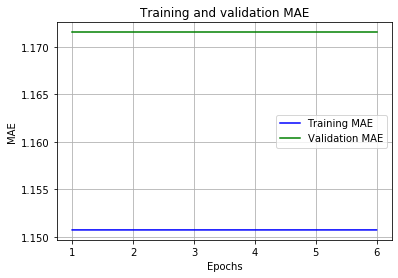

In [95]:
dropout_model = keras.models.Sequential([
    keras.layers.AlphaDropout(0.2, seed=0, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(0.2, seed=0),
    keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(0.2, seed=0),
    keras.layers.Dense(1, activation='softmax')
])

dropout_model.compile(optimizer='rmsprop', 
                      loss='huber_loss', 
                      metrics=['mae'])

dropout_history = dropout_model.fit(X_train,
                                    y_train,
                                    batch_size=256,
                                    epochs=100,
                                    validation_data=(X_val, y_val),
                                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

plot_model_performance(dropout_history)

### Batch Normalization

Train on 12384 samples, validate on 4128 samples
Epoch 1/100
12384/12384 [==============================] - 2s 133us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 2/100
12384/12384 [==============================] - 0s 34us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 3/100
12384/12384 [==============================] - 0s 36us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 4/100
12384/12384 [==============================] - 0s 36us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 5/100
12384/12384 [==============================] - 0s 36us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715
Epoch 6/100
12384/12384 [==============================] - 0s 38us/step - loss: 0.7688 - mae: 1.1507 - val_loss: 0.7870 - val_mae: 1.1715


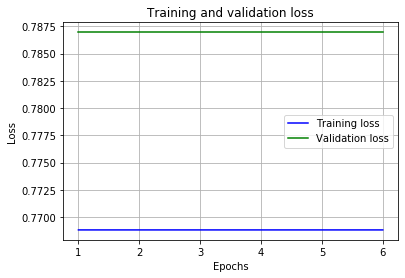

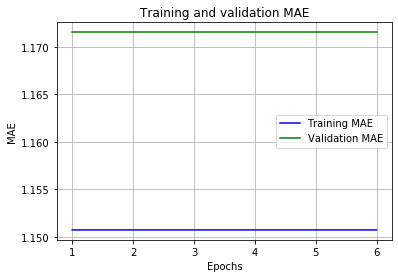

In [96]:
bn_model = keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='softmax')
])

bn_model.compile(optimizer='rmsprop', 
                      loss='huber_loss', 
                      metrics=['mae'])

bn_history = bn_model.fit(X_train_unscaled,
                          y_train,
                          batch_size=256,
                          epochs=100,
                          validation_data=(X_val, y_val),
                          callbacks=[keras.callbacks.EarlyStopping(patience=5)])

plot_model_performance(bn_history)

### Ensemble regressor

In [98]:
l1_pred = l1_model.predict(X_test)
l2_pred = l2_model.predict(X_test)
l1_l2_pred = l1_l2_model.predict(X_test)
ensemble_pred = (l1_pred + l2_pred + l1_l2_pred) / 3
ensemble_mae = np.mean(np.absolute(ensemble_pred - y_test))
ensemble_mae

0.8747185

In [101]:
l1_model = build_model(kernel_regularizer=keras.regularizers.l1(0.003), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l1_model.fit(X_train_full,
              y_train_full,
              batch_size=256,
              epochs=50,
              verbose=0)

l2_model = build_model(kernel_regularizer=keras.regularizers.l2(0.003), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l2_model.fit(X_train_full,
              y_train_full,
              batch_size=256,
              epochs=40,
              verbose=0)

l1_l2_model = build_model(kernel_regularizer=keras.regularizers.l1_l2(0.003), 
                       loss='huber_loss', 
                       optimizer='rmsprop')

l1_l2_history = l1_l2_model.fit(X_train_full,
                          y_train_full,
                          batch_size=256,
                          epochs=50,
                          verbose=0)

In [102]:
preds = (l1_pred + l2_pred + l1_l2_pred + l1_model.predict(X_test) + 
        l2_model.predict(X_test) + l1_l2_model.predict(X_test)) / 6
mae = np.mean(np.absolute(preds - y_test))
mae

0.8742885

### Random Regressor

In [78]:
np.random.seed(0)
y_test_copy = copy.copy(y_test)
np.random.shuffle(y_test_copy)
np.mean(np.absolute(y_test - y_test_copy))

1.2332697335271319